In [2]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='/usr/share/fonts/truetype/arphic/ukai.ttc',size=14)
plt.figure()
plt.title(u'匹萨价格与直径数据',fontproperties=font)
plt.xlabel(u'直径',fontproperties=font)
plt.ylabel(u'价格',fontproperties=font)
plt.axis([0,25,0,25])
plt.grid(True)

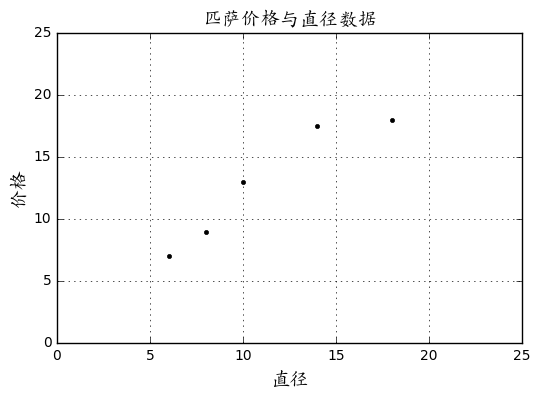

In [3]:
X=[[6],[8],[10],[14],[18]]
y=[[7],[9],[13],[17.5],[18]]
plt.plot(X,y,'k.')
plt.show()

##  线性拟合

In [5]:
from sklearn.linear_model import LinearRegression
# 创建拟合模型
model = LinearRegression()
model.fit(X,y)
print '预测 12 英寸匹萨价格: %.2f' % model.predict([12])[0]

预测 12 英寸匹萨价格: 13.68


/home/hadoop/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


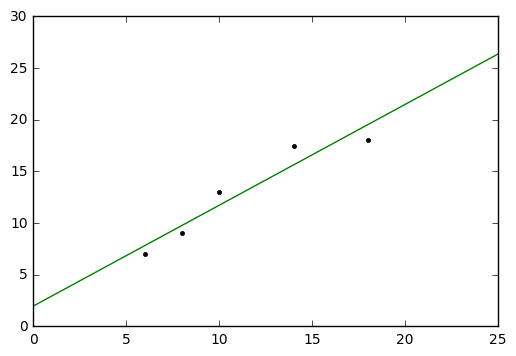

In [6]:
# 绘制预测直线
X2 = [[0],[10],[14],[25]]
y2 = model.predict(X2)
plt.plot(X,y,'k.')
plt.plot(X2,y2,'g-')
plt.show()

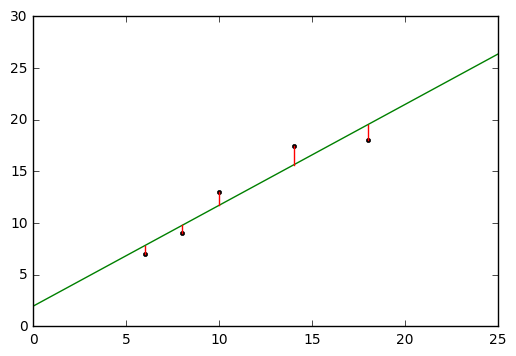

In [7]:
#  残差预测值
plt.plot(X,y,'k.')
plt.plot(X2,y2,'g-')

yr = model.predict(X)
for idx,x in enumerate(X):
    plt.plot([x,x],[y[idx],yr[idx]],'r-')
    
plt.show()

In [8]:
# 计算残差平方和,预测值和真实值的差值
import numpy as np
print '残差平方和: %.2f' % np.mean((model.predict(X) - y) ** 2)

残差平方和: 1.75


## 模型评估

使用 R 方来进行模型评估,表示测试集中由多少能够通过模型解释

R 方等于 1-方差/残差平方和


##  多项式模型

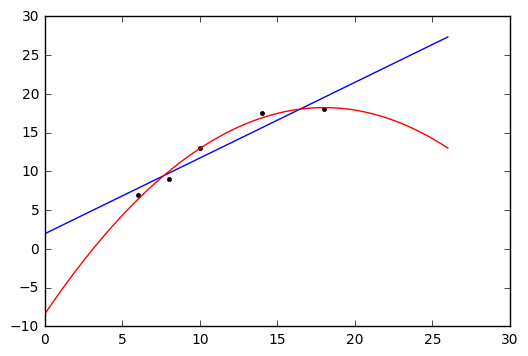

[[6], [8], [10], [14], [18]]
[[   1.    6.   36.]
 [   1.    8.   64.]
 [   1.   10.  100.]
 [   1.   14.  196.]
 [   1.   18.  324.]]
[[6], [8], [11], [16]]
[[   1.    6.   36.]
 [   1.    8.   64.]
 [   1.   11.  121.]
 [   1.   16.  256.]]
一元线性回归 r-squared 0.809726797708
二次回归 r-squared 0.867544365635


In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]
regressor = LinearRegression()
regressor.fit(X_train, y_train)   # 线性回归训练数据

xx = np.linspace(0, 26, 100)  # 0-26 100个数的等差数列

yy = regressor.predict(xx.reshape(xx.shape[0], 1))
plt.plot(X_train, y_train, 'k.')    
plt.plot(xx, yy) # 用预测数据画直线

quadratic_featurizer = PolynomialFeatures(degree=2)  # 构建 2 阶多项式的 x
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()

regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), 'r-')
plt.show()
print(X_train)
print(X_train_quadratic)
print(X_test)
print(X_test_quadratic)
print u'一元线性回归 r-squared', regressor.score(X_test, y_test)
print u'二次回归 r-squared', regressor_quadratic.score(X_test_quadratic, y_test)

array([  0.        ,   1.11111111,   2.22222222,   3.33333333,
         4.44444444,   5.55555556,   6.66666667,   7.77777778,
         8.88888889,  10.        ])